In [184]:
from PIL import Image, ImageOps, ImageFilter
from skimage import feature
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

Pixels matched: 165


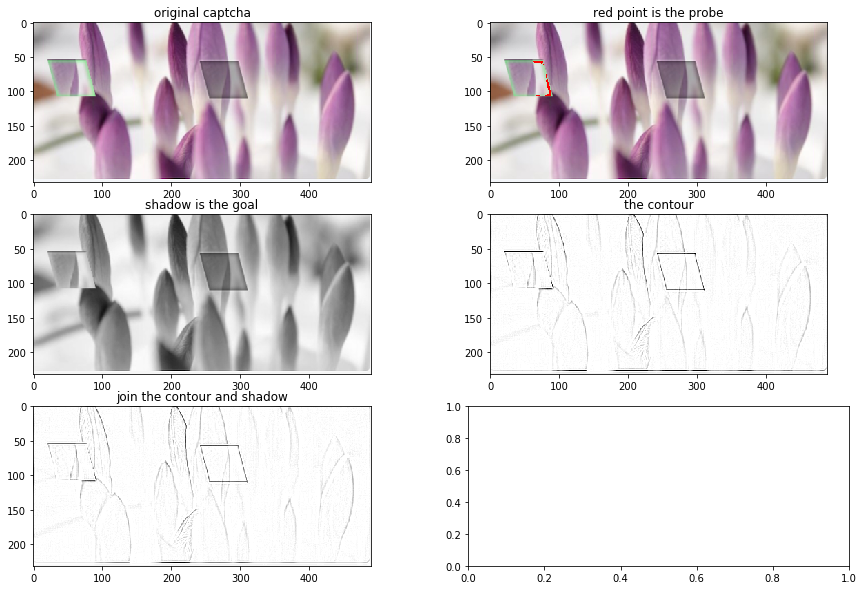

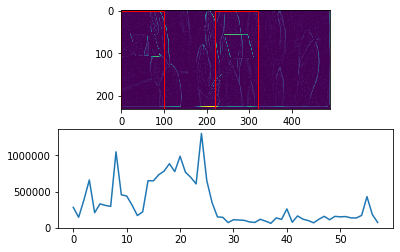

In [326]:
image = Image.open("./captcha3.png")

data = np.array(image)
fig,axs = plt.subplots(3,2,figsize=(15,10))

RGBim = image.convert('RGB')
HSVim = RGBim.convert('HSV')

# Make numpy versions
RGBna = np.array(RGBim)
HSVna = np.array(HSVim)

# Extract Hue
H = data[:,:,0]
S = data[:,:,1]
V = data[:,:,2]

# Find all green pixels, i.e. where 100 < Hue < 140
lo,hi = 150,200
green = np.where((H>lo) & (H<hi) & (S>220) & (V>150))
gray = np.where(S<150)

axs[0,0].set_title('original captcha')
axs[0,0].imshow(RGBna)
# change the color of detected region
RGBna[green] = [255,0,0] #red , means green box
#RGBna[gray] = [0,255,0] #green, useless, ignore it.

count = green[0].size
print("Pixels matched: {}".format(count))

axs[0,1].set_title('red point is the probe')
axs[0,1].imshow(RGBna)

#search(Image.fromarray(RGBna).convert('L'), green)
#search(np.array(image.convert("YCbCr"))[:,:,0], green)

# find the shadow
Y = np.array(image.convert("YCbCr"))[:,:,0]
axs[1,0].set_title('shadow is the goal')
axs[1,0].imshow(Y, cmap='gray')

# find the contour to filter noise
newImage = np.array(Image.fromarray(Y).filter(ImageFilter.CONTOUR))
axs[1,1].set_title('the contour')
axs[1,1].imshow(newImage, cmap='gray')

axs[2,0].set_title('join the contour and shadow')
axs[2,0].imshow(np.maximum(newImage, Y.astype('uint16')), cmap='gray')
plt.show()


search(np.maximum(newImage, Y.astype('uint16')), green)

In [320]:
image = Image.open("./captcha.png").convert('L').filter(ImageFilter.EMBOSS)
image = ImageOps.equalize(image)
image.show()

In [272]:
def search(data, probe):
    data = 255-np.array(data)
    (height, length) = data.shape
    
    fig,(ax, ax2) = plt.subplots(2)
    ax.imshow(data)

    chop = data[:, :100]
    if (probe):
        chop = np.zeros((height, length))
        chop[probe] = 255
        chop = chop[:, :100]
    step = 5

    rect = patches.Rectangle((0,0),100,height,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

    simlarity = [np.sum(np.multiply(chop, data[:, i:(i+100)])) for i in range(100, length-100, step)]
    ax2.plot(simlarity)

    index = simlarity.index(max(simlarity))
    start = 100 + index*step

    rect2 = patches.Rectangle((start, 0),100,height,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect2)

    plt.show()

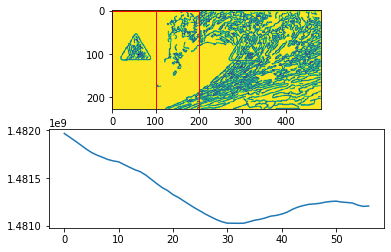

In [196]:
from skimage import io
from skimage.color import rgb2gray
from skimage import feature
from skimage.filters import gaussian
 
im = io.imread('captcha2.png')
edges = feature.canny(rgb2gray(im))

search(gaussian(edges))

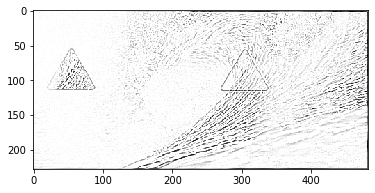

In [310]:
image = Image.open("./captcha2.png").convert('YCbCr')
data = np.array(image)
Y = data[:,:,0]

fig,ax = plt.subplots()
#ax.imshow(Y, cmap='gray')

newImage = Image.fromarray(Y).filter(ImageFilter.CONTOUR)
ax.imshow(np.array(newImage), cmap='gray')
ax.imshow(np.maximum(np.array(newImage), Y.astype('uint16')), cmap='gray')

In [263]:
255-np.array(image.convert("YCbCr"))[:,:,0]

array([[22, 49, 52, ..., 29, 10, 10],
       [44, 52, 52, ..., 45, 19,  9],
       [50, 52, 54, ..., 48, 34, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)

In [302]:
type(np.multiply(245,245))

numpy.int64

In [303]:
Y

array([[245, 245, 245, ..., 254, 251, 245],
       [245, 245, 245, ..., 183, 204, 242],
       [245, 245, 245, ...,  60,  65, 118],
       ...,
       [192, 199, 199, ..., 105, 102, 105],
       [193, 199, 201, ..., 108, 105, 111],
       [219, 196, 198, ..., 111, 100,  76]], dtype=uint8)